# 눈금 맞춤 변경하기

## 주 눈금과 보조 눈금

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

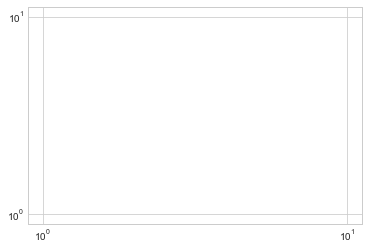

In [2]:
ax = plt.axes(xscale = 'log', yscale = 'log')

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

## 눈금 또는 레이블 숨기기

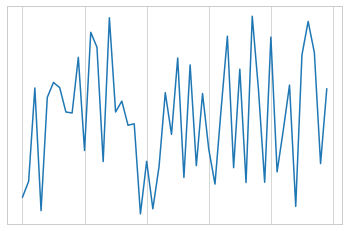

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

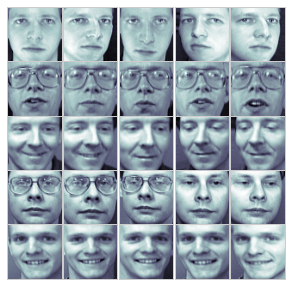

In [6]:
fig, ax = plt.subplots(5, 5, figsize = (5, 5))
fig.subplots_adjust(hspace = 0, wspace = 0)

# Scikit-Learn에서 얼굴 데이터 가져오기
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap = "bone")

## 눈금 개수 줄이기와 늘리기

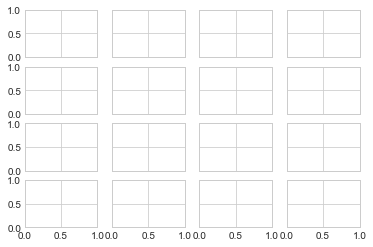

In [7]:
fig, ax = plt.subplots(4, 4, sharex = True, sharey = True)

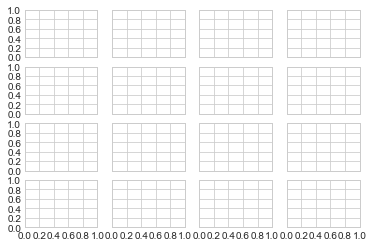

In [8]:
# 모든 축에 대해 x와 y의 주 눈금의 위치 지시자를 설정
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
    
fig

## 팬시 눈금 포맷

(0.0, 9.42477796076938)

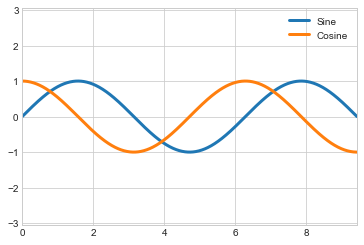

In [9]:
# 사인과 코사인 곡선 플로팅하기
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw = 3, label = 'Sine')
ax.plot(x, np.cos(x), lw = 3, label = 'Cosine')

# 그리드, 범례, 한계값 설정
ax.grid(True)
ax.legend(frameon = False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

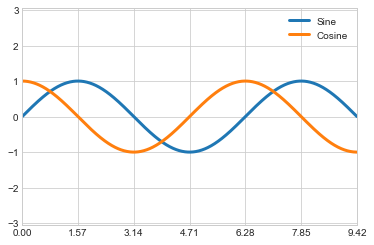

In [10]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

In [11]:
def format_func(value, tick_number):
    # pi/2 배수 구하기
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

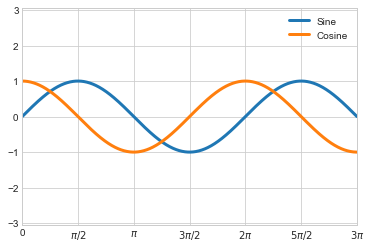

In [12]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig